# Titanic analysis report
## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

In this project, the Titanic dataset is chosen for analysis. This dataset is a sample or a subset of the people aboard on the famous Titanic which sanked due to striking an iceberg in 1912. This dataset is a collection of passengers infomartion, like the ticket infomartion, age, relationships, whether he or she survived in the disaster and other factors. 

The question I want to find out is: What are the important factors that impact survived rate in Titanic. 

So after figuring out the important factors, I can make a rough prediction on the other passengers due to their information by telling whether the survived rate is high or low.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


### General properties

Firstly, I will load the data to get an initial sense of the data.

In [2]:
titanic_data = pd.read_csv('titanic-data.csv')
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Next, I will figure out their datatypes and see if some datatypes need changes. As we can see below, since Survived, Pclass and some other fields are numbers, we don't need to convert the datatypes.

In [3]:
titanic_data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

I would like to see how many people are involved in this dataset and the average survived rate.

In [4]:
total_persons = len(titanic_data)
total_survival = titanic_data['Survived'].sum()
total_survival_ratio = total_survival * 1.0 / total_persons
print total_persons, total_survival, total_survival_ratio

891 342 0.383838383838


From above calculations, we can find there are 891 persons in this dataset, and only 38.4% people survived from this disaster.

### Dealing with missing values

And it's a good idea to look through the whole dataset to see if some values are missing. Looking through the dataset, we may find many values are missing for the Age column and Cabin Column. Since we will not invetigate on the Cabin factor, so there won't be any discussions on how to deal with the missing values of Cabin.

In [5]:
titanic_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


The method on dealing with missing values relies on the percentage and the type of missing data. So I would figure out the percentage first. The following calculation reveals that there are about 20% missing value in the age column.

In [6]:
valid_age_titanic_data = titanic_data[titanic_data['Age'] > 0]
invalid_age_titanic_data = titanic_data[(np.isnan(titanic_data['Age']))]
print len(valid_age_titanic_data)/float(len(titanic_data))

0.801346801347


Then, we need to find if there are some patterns in it, i.e., do the missing values belong to the "Missing Completely at Random"(MCAR) type or not. I would divide the current dataset into two: one containing missing values, the other one containing non missing values. Then I would perform a t-test to check if there are significant difference on these two datasets. 

The two datasets are independent and of different size. So I would perform a two-tailed independent t test using scipy library. The null hypothesis is that statistically, the two datasets are the same. While the alternative hypothesis is that two datasets are significantly different. We will use  0.05 as the $\alpha$ level.

In [7]:
from scipy.stats import ttest_ind
survived_with_non_missing_values = valid_age_titanic_data['Survived']
survived_with_missing_values = invalid_age_titanic_data['Survived']
ttest_ind(survived_with_non_missing_values, survived_with_missing_values)

Ttest_indResult(statistic=2.7606993230995345, pvalue=0.0058865348400755626)

The p value of the t-test is only about 0.0059, less than 0.05. So we fail to reject the null hypothesis, meaning the there are no significant difference between the two datasets. 

So in my opinion, pairwise deletion or replacing the missing values with mean both work here. And for this analysis, I will choose to replace the missing values with mean.

In [8]:
mean_age = valid_age_titanic_data['Age'].mean()
titanic_data['Age'].fillna(mean_age, inplace=True)
titanic_data.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,NaN,C


<a id="eda"></a>
## Exploratory Data Analysis


### Sex & Pclass

When we watch the Titanic movie, we know ladies and children firrst. So I would like to first investigate the impact of sex.

Since for many factors, I would like to split the dataset into groups due to their sex or Pclass or others. So I will write a helper function to reduce the duplicated code.

In [9]:
# helper function for grouping
def compute_survived_ratio_for_given_group(group_index):
    grouped_data = titanic_data.groupby(group_index)
    print grouped_data.size() 
# since I'm only concerned about large group, i.e. a group with enough persons, 
# so I would like to print the group size
    survival_ratio_by_group = grouped_data.sum()['Survived'] * 1.0 / grouped_data.size()
    return survival_ratio_by_group

In [10]:
survival_ratio_by_sex = compute_survived_ratio_for_given_group('Sex')
survival_ratio_by_sex

Sex
female    314
male      577
dtype: int64


Sex
female    0.742038
male      0.188908
dtype: float64

From above, we can see that there are 314 female passengers and 577 male passengers. And the survived rate differs a lot. For male, survived rate is only 18.89%, and for female, survived rate is much higher, 74.20%.

Next, we will invetigate the Pclass factor to see the status effect.

In [11]:
survival_ratio_by_Pclass = compute_survived_ratio_for_given_group('Pclass')
survival_ratio_by_Pclass

Pclass
1    216
2    184
3    491
dtype: int64


Pclass
1    0.629630
2    0.472826
3    0.242363
dtype: float64

We can see that the higher the status, the higher survived ratio, which conforms to the reality. 

What about combining the sex ang the status?

In [12]:
survival_ratio_by_sex_Pclass = compute_survived_ratio_for_given_group(['Sex', 'Pclass'])
survival_ratio_by_sex_Pclass

Sex     Pclass
female  1          94
        2          76
        3         144
male    1         122
        2         108
        3         347
dtype: int64


Sex     Pclass
female  1         0.968085
        2         0.921053
        3         0.500000
male    1         0.368852
        2         0.157407
        3         0.135447
dtype: float64

We would draw a bar plot to see this much clearly.

Text(0,0.5,u'Survived rate')

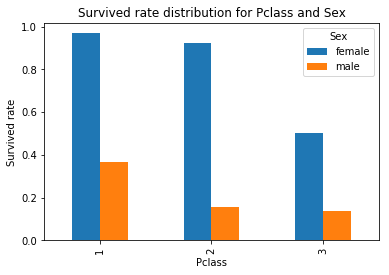

In [13]:
p1 = survival_ratio_by_sex_Pclass.unstack('Sex').plot(kind='bar')
p1.set_title("Survived rate distribution for Pclass and Sex")
p1.set_ylabel('Survived rate')

From the above chart, we can easily see the difference caused by sex and Pclass. The survived rate between first-class female passengers and second-class females are similar, but dropped dramtically for third-class female passengers. While for men, the first-class male passengers have the highest survived ratio, but still less than the  third-class female passengers. ** We can tell from this figure that both sex and Pclass are important and influential factors.**

### Age

First, we can get statistical information of the age distribution of people on Titanic. 

In [14]:
titanic_data['Age'].describe()

count    891.000000
mean      29.699118
std       13.002015
min        0.420000
25%       22.000000
50%       29.699118
75%       35.000000
max       80.000000
Name: Age, dtype: float64

The youngest one is a baby with a few months old, and the oldest person is 80 years old. From the quartile data, we can see that most people are young adults. We can draw a histogram to show the age distribution. 

Text(0.5,1,u'The age distribution on the Titanic')

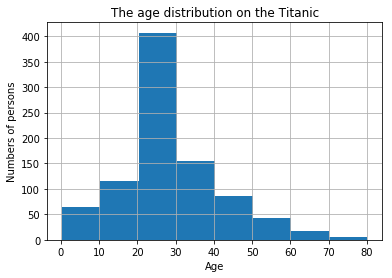

In [15]:
total_age_histogram = titanic_data['Age'].hist(bins=8)
total_age_histogram.set_xlabel('Age')
total_age_histogram.set_ylabel('Numbers of persons')
total_age_histogram.set_title('The age distribution on the Titanic')

It's a little postively skewed. Since passengers in Titanic want to visit or do business or start their new life in America, It's easy to understand that older people are less.

Next, we would calculate the survived ratio for each range. Since the function will be used later, I will encapsulate this into a function.

In [16]:
# helper function
def calc_draw_survived_ratio_for_range(data, index, min, max, interval):
    grouped_by_range = data.groupby(pd.cut(data[index], np.arange(min, max, interval)))
    survived = grouped_by_range.sum()['Survived']
    total_counts_inrange = grouped_by_range.size()
    print total_counts_inrange, survived
    survived_ratio = survived * 1.0 / total_counts_inrange
    survived_ratio_scatter = survived_ratio.plot(kind='bar')
    survived_ratio_scatter.set_ylabel('Survived ratio')
    survived_ratio_scatter.set_title('Survived ratio distribution related to ' + index)

Age
(0, 10]      64
(10, 20]    115
(20, 30]    407
(30, 40]    155
(40, 50]     86
(50, 60]     42
(60, 70]     17
(70, 80]      5
dtype: int64 Age
(0, 10]      38
(10, 20]     44
(20, 30]    136
(30, 40]     69
(40, 50]     33
(50, 60]     17
(60, 70]      4
(70, 80]      1
Name: Survived, dtype: int64


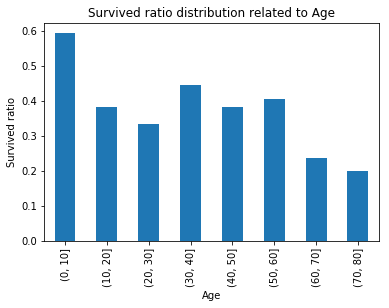

In [17]:
calc_draw_survived_ratio_for_range(titanic_data, 'Age', 0, 90, 10)

From the above figure, we can see that **it's roughly a uniform distribution except for children less than 10 years old. So "children first" is proved here.**

### Alone

Next, we would explore whether a person is alone has some effect on survived ratio. Here, I define alone person as having no siblings or parents or spouse or children on Titanic. Maybe it's a little deviated from the reality. Beacuse one could have a servant with him or her. But I think it count for most conditions.

I would add a new column called relatives by adding the SibSn and Parch columns together.

In [18]:
titanic_data['relatives'] = titanic_data['SibSp'] + titanic_data['Parch']
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,relatives
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


 First, we can look at some statistical data.

In [19]:
titanic_data['relatives'].describe()

count    891.000000
mean       0.904602
std        1.613459
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max       10.000000
Name: relatives, dtype: float64

The max for relatives is 10. That's a pretty big family. And the min is 0, i.e., alone persons. Most people on Titanic have 0 or 1 relative.

Like the age variable, I would first draw the histogram to show the distribution, then the survived ratio for each range.

Text(0.5,0,u'Numbers of relatives')

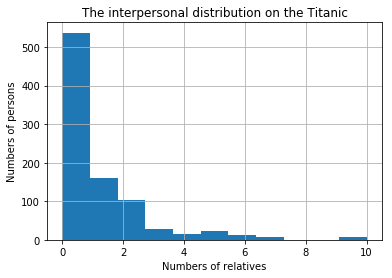

In [20]:
histogram_for_relatives =  titanic_data['relatives'].hist(bins=11)
histogram_for_relatives.set_title('The interpersonal distribution on the Titanic')
histogram_for_relatives.set_ylabel('Numbers of persons')
histogram_for_relatives.set_xlabel('Numbers of relatives')

From the histogram, we can easily tell most people are alone, have 0 relatives. And only a few people have 3 or more relatives on board.

relatives
(-1, 0]    537
(0, 1]     161
(1, 2]     102
(2, 3]      29
(3, 4]      15
(4, 5]      22
(5, 6]      12
(6, 7]       6
(7, 8]       0
(8, 9]       0
(9, 10]      7
dtype: int64 relatives
(-1, 0]    163.0
(0, 1]      89.0
(1, 2]      59.0
(2, 3]      21.0
(3, 4]       3.0
(4, 5]       3.0
(5, 6]       4.0
(6, 7]       0.0
(7, 8]       NaN
(8, 9]       NaN
(9, 10]      0.0
Name: Survived, dtype: float64


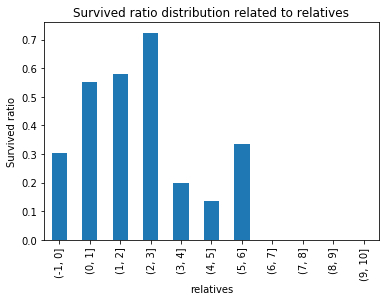

In [21]:
calc_draw_survived_ratio_for_range(titanic_data, 'relatives', -1, 11, 1)

I would only consider the first 3 groups, i.e, with 0, 1, 2 relatives on board. Since the other groups have pretty small people in them. From the above figure, we can see that people with 0 relative on board have pretty less survived ratio compared to people with 1 or 2 relatives on board.

### Other factors

I would consider whether the embarked port has an effect on the survived ratio.

In [22]:
survival_ratio_by_embarked = compute_survived_ratio_for_given_group('Embarked')
survival_ratio_by_embarked

Embarked
C    168
Q     77
S    644
dtype: int64


Embarked
C    0.553571
Q    0.389610
S    0.336957
dtype: float64

When I looked at the wikipedia of Titanic, I learned that Titanic set off from Southampton, accommodating more people in Cherbourg, France and Queenstown in Ireland. So most people embarked at Southampton. But it's strange that people embarked at Cherbourg have higher survived ratio. Since sex and Pclass are two most important factors. Maybe that's because people embarked in Cherbourg have more female or have a higher ratio of first-class. So next, I would explore the sex and Pclass ratio of people embarked at different ports.

In [23]:
def calc_ratio_for_different_port(index):
    grouped_data_by_port = titanic_data.groupby('Embarked')
    grouped_data_by_port_index = titanic_data.groupby(['Embarked', index])
    return grouped_data_by_port_index.size() / grouped_data_by_port.size()

In [24]:
calc_ratio_for_different_port('Sex')

Embarked  Sex   
C         female    0.434524
          male      0.565476
Q         female    0.467532
          male      0.532468
S         female    0.315217
          male      0.684783
dtype: float64

Text(0,0.5,u'Survived rate')

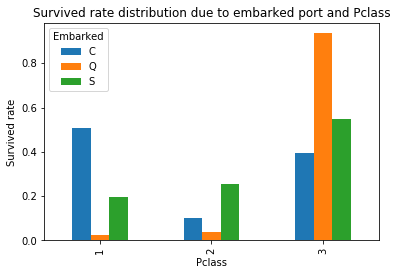

In [25]:
survived_ratio_by_port_Pclass = calc_ratio_for_different_port('Pclass')
p2 = survived_ratio_by_port_Pclass.unstack('Embarked').plot(kind='bar')
p2.set_title('Survived rate distribution due to embarked port and Pclass')
p2.set_ylabel('Survived rate')

I would say that since about 50% people embarked at Cherbourg are first-class, while for Southampton, the ratio is only about 20%. So I would draw a conclusion that Pclass, instead the embarked port have strong effects on survived ratio.

<a id="conclusions"></a>
## Conclusions

From the above analysis, there are 4 main conclusions.

1. Sex and Pclass are two important factors impacting survived ratio.
2. Age is less important. But it reveals that 'children first' work for Titanic.
3. Compared to 1 and 2 relatives, alone persons has a smaller survived raio.
4. It seems that the embarked port has some influence on the survived ratio. But I would say that's because people embarked at different ports have differnt ratio of Pclass. 

But there are some limitations of my analysis.
- Since the dataset is just a sample chosen from the actual population of the people that were on the Titanic. And we don't know how the samples are selected. Maybe there are some sort of intentional or unintentional bias on the sampling method. So 
- Since some values for the age factor are missing, I just delete the missing values when analyzing the age factor. This manipulation will reduce the confidence in my conclusions.
- There are a few factors that I don't deal with, like the Ticket, Fare, Cabin, etc. Since I can't come up  a good way of analyzing these variables. So when predicting if a passenger survived or not, I may leave out some information.

Maybe my future work is to use machine learning to predict the survived prediction question. 
